In [2]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv

# load environment varibles
load_dotenv()

True

In [5]:
import sys
sys.path.append("your/path/to/dagpt")
from src.models.llms import load_llm

MODEL_NAME = "gpt-3.5-turbo"
llm = load_llm(model_name=MODEL_NAME)
llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x17d74d2d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x17d73c580>, temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1000)

In [6]:
llm.invoke("Hello. Who are you?")

AIMessage(content='Hello! I am an AI digital assistant here to help answer any questions you may have. How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 13, 'total_tokens': 38}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-0f47bca4-b9a6-4ead-b7ad-70e8ec382185-0', usage_metadata={'input_tokens': 13, 'output_tokens': 25, 'total_tokens': 38})

In [7]:
df = pd.read_csv("../data/raw/sample_data.csv")

da_agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    verbose=True,
    return_intermediate_steps=True,
)
da_agent

AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, messages=[SystemMessage(content='\nYou are working with a pandas dataframe in Python. The name of the dataframe is `df`.\nThis is the result of `print(df.head())`:\n|    | Store Name   | Date      | Product   |   Unit Price |   Sales |   Revenue |   Stock Quantity |    Profit | Store Address   | Postal Code   |\n|---:|:-------------|:----------|:----------|-------------:|--------:|----------:|-----------------:|----------

In [17]:
query = "Describe this data"
response = da_agent(query)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.describe()'}`


       Unit Price       Sales       Revenue  Stock Quantity        Profit
count  100.000000  100.000000    100.000000      100.000000    100.000000
mean   537.351300   24.880000  13475.005300       51.300000   5390.002120
std    272.028629   13.773258  11008.943033       26.595169   4403.577213
min    108.790000    2.000000    777.760000       10.000000    311.104000
25%    296.965000   12.000000   4801.042500       29.000000   1920.417000
50%    532.200000   25.500000   9605.830000       49.000000   3842.332000
75%    776.627500   36.250000  21305.137500       75.000000   8522.055000
max    997.410000   49.000000  43472.000000       98.000000  17388.800000The data in the dataframe can be described as follows:

- **Unit Price**: 
  - Mean: 537.35
  - Standard Deviation: 272.03
  - Minimum: 108.79
  - Maximum: 997.41

- **Sales**: 
  - Mean: 24.88
  - Standard Deviation: 13.77
  - Mi

In [18]:
print(response["intermediate_steps"][-1][0].tool_input['query'])

df.describe()




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nplt.scatter(df['Sales'], df['Revenue'])\nplt.xlabel('Sales')\nplt.ylabel('Revenue')\nplt.title('Scatter Plot of Revenue vs Sales')\nplt.show()"}`




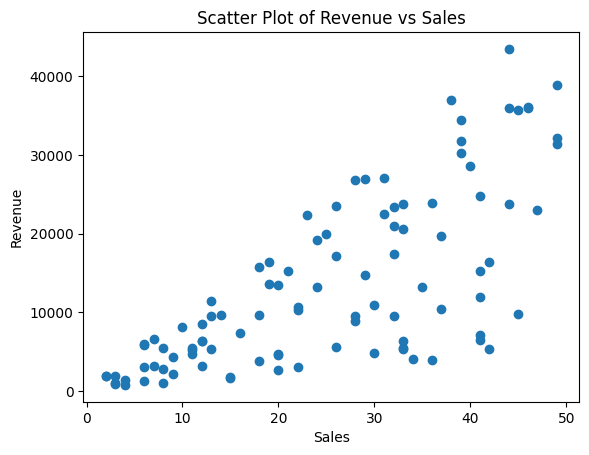

Here is the scatter plot of Revenue vs Sales. The plot shows the relationship between these two variables.

> Finished chain.


In [9]:
query = "plot scatter plot of Revenue and Sales"
response = da_agent(query)

In [16]:
print(response["intermediate_steps"][-1][0].tool_input['query'])

import matplotlib.pyplot as plt
plt.scatter(df['Sales'], df['Revenue'])
plt.xlabel('Sales')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Revenue vs Sales')
plt.show()
